# Feature Engineering and Polynomial Regression

The goal of this notebook is to slightly dive into feature engineering and it's use in Polynomial Regression prediction models.

**Polynomial Regression** can be used to fit very complicated, non-linear, curves into the spectrum of the training example, for which Linear Regression might not be the best choice or even possible to use.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

Below we are defining a couple of functions utilised in this lab.

In [31]:
def zcore_normalize_features(X, rtn_ms=False):
    """
    X: training set, with features values in a Matrix numpy shape.
        X is a numpy array of shape: (m, n), being 'm' rows of the set and 'n' columns (for features values x1, x2 as number of columns)
    Returns
      X_norm: (numpy array (m,n)) input normalized by column
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    if rtn_ms:
        return (X_norm, mu, sigma)
    else:
        return (X_norm)

Model That Predicts a value for Parameters and multiple features:

$$ f_{w,b}(x^{(i)}) = w \cdot x^{(i)} + b $$

Cost Function:

$$ J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$


In [32]:
def compute_cost(X, y, w, b):
    """
    Args:
        X : (ndarray): Shape (n,m) matrix of examples with multiple features
        y : (ndarray): Shape (n,) vector of target values, or, target value for each example
        w : (ndarray): Shape (n,) vector of parameters for prediction
        b : scalar, bias parameter for prediction.
    """
    m = X.shape[0]
    cost = 0.0
    # Loops and calculates the accumulated cost corresponding to the totality of training examples (m rows)
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost += (f_wb - y[i]) ** 2
    cost /= (2 * m)
    return cost
    

Next we define the gradient descent, which goes as:

$$ \frac{\partial J(w, b)}{\partial w_j} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$
$$ \frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) $$


In [33]:
def gradient_descent(X, y, w, b):
    """
    Args:
        X : (ndarray): Shape (n,m) matrix of examples with multiple features
        y : (ndarray): Shape (n,) vector of target values, or, target value for each example
        w : (ndarray): Shape (n,) vector of parameters for prediction
        b : scalar, bias parameter for prediction.
    Returns
        dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
        dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape #(number of examples, number of features), n needed as it does columnar calculation
    dj_dw = np.zeros((n,)) # Array of parameters w
    dj_db = 0. # scalar, float, for the bias parameter
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        dj_db += err
        for j in range(n): # Derivative at the column level, partial, for x features
            dj_dw[j] += err * X[i, j]
    dj_db /= m
    dj_dw /= m
    return (dj_dw, dj_db)

Running the algorithm for Gradient Descent involves the following formula:

$$
\text{repeat until convergence:} \left\{
\begin{array}{ll}
w_j & := w_j - \alpha \frac{\partial J(w, b)}{\partial w_j} \quad \text{for } j = 0..n-1 \\
b & := b - \alpha \frac{\partial J(w, b)}{\partial b}
\end{array}
\right.
$$



In [37]:
def _gradient_descent(X, y, w_init, b_init, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X : (array_like Shape (m,n)    matrix of examples 
      y : (array_like Shape (m,))    target value of each example
      w_in : (array_like Shape (n,)) Initial values of parameters of the model
      b_in : (scalar)                Initial value of parameter of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    w = copy.deepcopy(w_init)
    b = b_init
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

         # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"Parameters w [{w}], bias [{b}], iteration [i] - COST: {cst}")
    return w, b

In [38]:
def run_gradient_descent(X, y, iterations = 1000, alpha = 1e6):
    m,n = X.shape 
    # initialize parameters - set initially as zero both vector of params 'w' and bias 'b'
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out = _gradient_descent(X ,y, initial_w, initial_b,
                                               compute_cost, gradient_descent, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.2f}")
    
    return(w_out, b_out)

<a name='FeatureEng'></a>
# Feature Engineering and Polynomial Regression Overview

Out of the box, linear regression provides a means of building models of the form:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 
What if your features/data are non-linear or are combinations of features? For example,  Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.


Parameters w [[18.14]], bias [1.245], iteration [i] - COST: 1657.5632937500002
Parameters w [[15.64]], bias [-12.421526697012833], iteration [i] - COST: 694.5491067092513
Parameters w [[16.43]], bias [-22.666568197173294], iteration [i] - COST: 588.4754483004803
Parameters w [[17.03]], bias [-30.50306099462336], iteration [i] - COST: 526.4137606474569
Parameters w [[17.5]], bias [-36.49724065348807], iteration [i] - COST: 490.10264314551796
Parameters w [[17.85]], bias [-41.08222410353839], iteration [i] - COST: 468.8576963175959
Parameters w [[18.12]], bias [-44.58930504432178], iteration [i] - COST: 456.42768047748433
Parameters w [[18.33]], bias [-47.27189198475464], iteration [i] - COST: 449.1551137331723
Parameters w [[18.49]], bias [-49.323818591094565], iteration [i] - COST: 444.9000727315512
Parameters w [[18.61]], bias [-50.89334938032822], iteration [i] - COST: 442.41052886595054
w,b found by gradient descent: w: [18.7], b: -52.08


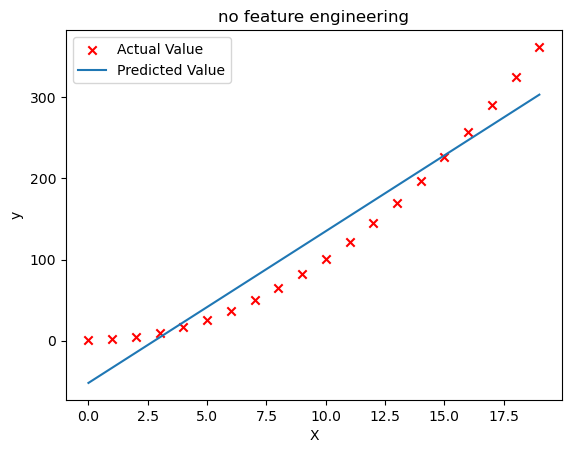

In [39]:
# Create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)
model_w,model_b = run_gradient_descent(X,y,iterations=1000, alpha = 1e-2)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Well, as expected, not a great fit. What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.
To accomplish this, you can modify the *input data* to *engineer* the needed features. If you swap the original data with a version that squares the $x$ value, then you can achieve $y= w_0x_0^2 + b$. Let's try it. Swap `X` for `X**2` below:

Parameters w [[0.28]], bias [0.001245], iteration [i] - COST: 7329.218075123962
Parameters w [[1.]], bias [0.00896150448882546], iteration [i] - COST: 0.22484417554619657
Parameters w [[1.]], bias [0.013488602623268592], iteration [i] - COST: 0.22279467541048362
Parameters w [[1.]], bias [0.01799502081680964], iteration [i] - COST: 0.22076385688302258
Parameters w [[1.]], bias [0.02248085353613408], iteration [i] - COST: 0.21875154967718383
Parameters w [[1.]], bias [0.026946194816400308], iteration [i] - COST: 0.2167575850585226
Parameters w [[1.]], bias [0.03139113826321092], iteration [i] - COST: 0.2147817958306451
Parameters w [[1.]], bias [0.03581577705457486], iteration [i] - COST: 0.2128240163211934
Parameters w [[1.]], bias [0.04022020394286081], iteration [i] - COST: 0.21088408236794015
Parameters w [[1.]], bias [0.044604511256741045], iteration [i] - COST: 0.20896183130502996
w,b found by gradient descent: w: [1.], b: 0.05


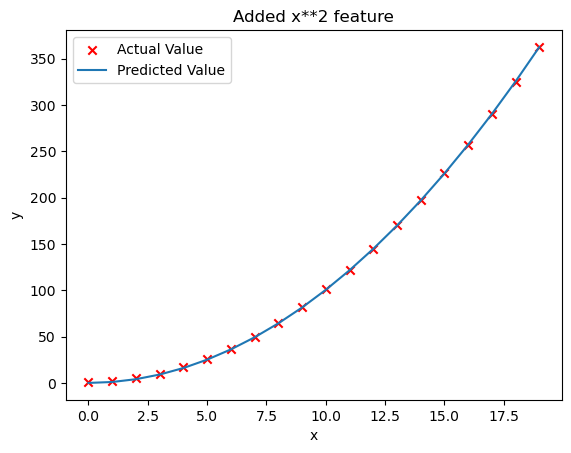

In [40]:
# Create the target data again
x = np.arange(0, 20, 1) #
y = 1 + x**2

# Engineer the features now
X = x**2      #<-- added engineered feature
X = X.reshape(-1, 1)  #X should be a 2-D Matrix, to be usable with previously defined algorithms

# Run the gradient descent
model_w,model_b = run_gradient_descent(X, y, iterations=10000, alpha = 1e-5)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Gradient descent has emphasized the data that is the best fit to the $x^2$ data by increasing the $w_1$ term relative to the others.  If you were to run for a very long time, it would continue to reduce the impact of the other terms. 
>Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter

Let's review this idea:
- less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data.
- above, after fitting, the weight associated with the $x^2$ feature is much larger than the weights for $x$ or $x^3$ as it is the most useful in fitting the data. 

## Scaling features
If the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. 

In the example above, there is $x$, $x^2$ which will naturally have very different scales. Let's apply Z-score normalization to the example.

In [42]:
# Create Target data
x = np.arange(0, 20, 1)
X = np.c_[x, x**2]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# Apply feature scaling now
X = zcore_normalize_features(X)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[ 19 361]
Peak to Peak range by column in Raw        X:[3.3  3.18]


We can try again with a bigger value of alpha as well:

Parameters w [[10.96 11.35]], bias [12.350000000000001], iteration [i] - COST: 10373.71025
Parameters w [[9.61e-13 1.13e+02]], bias [123.49999999999994], iteration [i] - COST: 3.52955301657606e-26
Parameters w [[9.61e-13 1.13e+02]], bias [123.49999999999994], iteration [i] - COST: 3.534096855390133e-26
Parameters w [[9.61e-13 1.13e+02]], bias [123.49999999999994], iteration [i] - COST: 3.52955301657606e-26
Parameters w [[9.61e-13 1.13e+02]], bias [123.49999999999994], iteration [i] - COST: 3.52955301657606e-26
Parameters w [[9.61e-13 1.13e+02]], bias [123.49999999999994], iteration [i] - COST: 3.52955301657606e-26
Parameters w [[9.61e-13 1.13e+02]], bias [123.49999999999994], iteration [i] - COST: 3.534096855390133e-26
Parameters w [[9.61e-13 1.13e+02]], bias [123.49999999999994], iteration [i] - COST: 3.52955301657606e-26
Parameters w [[9.61e-13 1.13e+02]], bias [123.49999999999994], iteration [i] - COST: 3.52955301657606e-26
Parameters w [[9.61e-13 1.13e+02]], bias [123.4999999999999

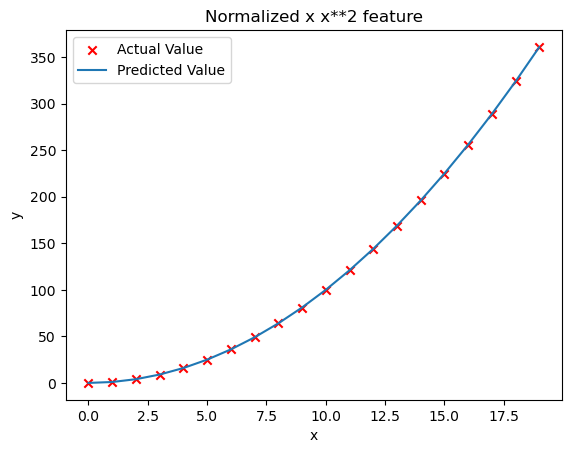

In [44]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2]
X = zcore_normalize_features(X) 

model_w, model_b = run_gradient_descent(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

This could potentially allow for Gradient Descent to run much faster